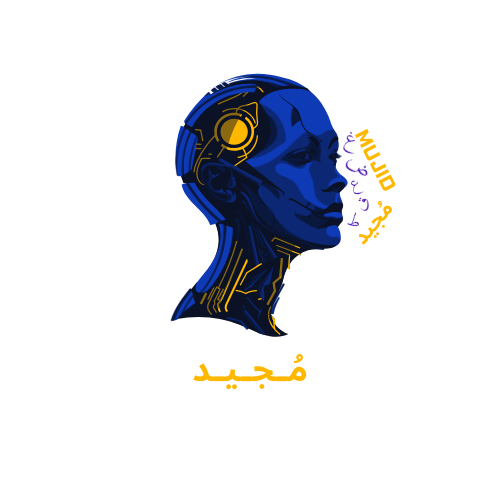

In [1]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Read the data
import pandas as pd

# file_path = '/content/drive/MyDrive/AraPoems_Dataset_full_final.csv'
file_path = '/content/drive/MyDrive/allam/Maverick Minds/Omar/Data/AraPoems_Dataset_full_final.csv'


df = pd.read_csv(file_path)

df.shape

(1007968, 16)

## **Data exploration and data preperation**

In [3]:
#Total number of poets

from collections import Counter

poet_counts = Counter(df['poet'])
total_poets = len(poet_counts)

print(f"Total number of poets: {total_poets}")

Total number of poets: 1382


In [4]:
display(df.head())

,Unnamed: 0,poem_title,first_hemistich,second_hemistich,poet,meter,sub_meter,البحر,جزء البحر,era,rhyme,قافية,type_en,type_ar,link,gender
0,27,عَفـا جـانِبُ الْبَطْحاءِ مِنْ إِبْنِ هاشِمٍ,عشية راحوا يحملون سريره,تعاوره أصحابه في التزاحم,آمِنَةُ بِنْتُ وَهَب,taweel,complete,طويل,تام,Pre_Islam,meem,م,general,قصائد عامه,https://poetry.dctabudhabi.ae/#/poems/97691-%D...,f
1,28,عَفـا جـانِبُ الْبَطْحاءِ مِنْ إِبْنِ هاشِمٍ,فإن يك غالته المنايا وريبها,فقد كان معطاء كثير التراحم,آمِنَةُ بِنْتُ وَهَب,taweel,complete,طويل,تام,Pre_Islam,meem,م,general,قصائد عامه,https://poetry.dctabudhabi.ae/#/poems/97691-%D...,f
2,36,تَرَوَّحْنا مِنَ اللَّعْباءِ عَصْراً,على مثل ابن مية فانعياه,تشق نواعم البشر الجيوبا,آمِنَة بنتُ عُتَيْبَة اليَرْبُوعيَّة,wafer,complete,وافر,تام,Pre_Islam,baa,ب,elegy poems,قصائد رثاء,https://poetry.dctabudhabi.ae/#/poems/97689-%D...,f
3,37,تَرَوَّحْنا مِنَ اللَّعْباءِ عَصْراً,وكان أبي عتيبة شمريا,فلا تلقاه يدخر النصيبا,آمِنَة بنتُ عُتَيْبَة اليَرْبُوعيَّة,wafer,complete,وافر,تام,Pre_Islam,baa,ب,elegy poems,قصائد رثاء,https://poetry.dctabudhabi.ae/#/poems/97689-%D...,f
4,38,تَرَوَّحْنا مِنَ اللَّعْباءِ عَصْراً,ضروبا للكمي إذا اشمعلت,عوان الحرب لا ورعا هيوبا,آمِنَة بنتُ عُتَيْبَة اليَرْبُوعيَّة,wafer,complete,وافر,تام,Pre_Islam,baa,ب,elegy poems,قصائد رثاء,https://poetry.dctabudhabi.ae/#/poems/97689-%D...,f


In [5]:
print("Number of rows:", len(df))

Number of rows: 1007968


In [6]:
# Find rows with missing values
rows_with_missing_values = df[df.isnull().any(axis=1)]

# Display the rows with missing values
print("Rows with missing values:")
display(rows_with_missing_values)


Rows with missing values:


,Unnamed: 0,poem_title,first_hemistich,second_hemistich,poet,meter,sub_meter,البحر,جزء البحر,era,rhyme,قافية,type_en,type_ar,link,gender
1000557,2076477,فَسا اَبنُ جَميلَةٍ,فسا ابن جميلة وقليلة العدى,وإذا لم الرياح أخرجت اهتذى,NaN,taweel,complete,طويل,تام,NaN,alif,ا,satire poems,قصائد هجاء,https://www.aldiwan.net/poem112376.html,NaN
1000558,2076478,فَسا اَبنُ جَميلَةٍ,في الشعر قال توفيق بلا حزن,إلا من ابتغاه أذا وما اكتفى,NaN,taweel,complete,طويل,تام,NaN,alif,ا,satire poems,قصائد هجاء,https://www.aldiwan.net/poem112376.html,NaN


In [7]:
df['type_ar'].value_counts()

,count
type_ar,
قصائد عامه,339903
قصائد مدح,138899
قصائد رومنسيه,128924
قصائد قصيره,84476
قصائد حزينه,62365
قصائد هجاء,44075
قصائد عتاب,42927
قصائد رثاء,35029
قصائد غزل,29525


In [8]:
#remove missing values
import pandas as pd

missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Unnamed: 0          0
poem_title          0
first_hemistich     0
second_hemistich    0
poet                2
meter               0
sub_meter           0
البحر               0
جزء البحر           0
era                 2
rhyme               0
قافية               0
type_en             0
type_ar             0
link                0
gender              2
dtype: int64


In [9]:
# Assuming the dataset is already loaded in 'df', let's calculate the number of unique poets
number_of_poets = df['poet'].nunique()
number_of_poets

1381

In [10]:
!pip install ace_tools

In [13]:
modernPoet = df[df['era']=='Modern']

In [14]:
# Group the data by poet and count the number of verses (assumes each row represents a verse)
top_poets = modernPoet.groupby('poet').size().reset_index(name='verse_count')

# Sort poets by the number of verses in descending order and select the top 50
top_50_poets = top_poets.sort_values(by='verse_count', ascending=False).head(25)

# Display the top 50 poets
print("Top 100 Poets:")
top_50_poets

Top 100 Poets:


,poet,verse_count
85,خليل مطران,19028
19,أحمد محرم,13106
16,أحمد شوقي,13055
48,الأخرس,10795
58,المفتي فتح الله,9388
12,أحمد الكاشف,8651
104,صالح مجدي,7434
1,أبو الفضل الوليد,7241
78,حيدر الحلي,6755
64,بهاء الدين الروّاس,6220


In [15]:

# Assuming you want a unique list of poets
unique_poets = top_50_poets['poet'].unique().tolist()

unique_poets

['خليل مطران',
 'أحمد محرم',
 'أحمد شوقي',
 'الأخرس',
 'المفتي فتح الله',
 'أحمد الكاشف',
 'صالح مجدي',
 'أبو الفضل الوليد',
 'حيدر الحلي',
 'بهاء الدين الروّاس',
 'معروف الرصافي',
 'سليمان الصولة',
 'محمود سامي البارودي',
 'جميل صدقي الزهاوي',
 'ناصيف اليازجي',
 'حافظ ابراهيم',
 'ابن عديِّم الرواحي',
 'عمر الأنسي',
 'محمود قابادو',
 'إبراهيم الطباطبائي',
 'بطرس كرامة',
 'أبو المحاسن الكربلائي',
 'الشاذلي خزندار',
 'أحمد زكي أبو شادي',
 'محمد ولد ابن ولد أحميدا']

In [16]:
# Group the data by type and count the number of verses for each type
type_counts = df.groupby('type_ar').size().reset_index(name='verse_count')

# Display the verse counts for each type
print("Verse Counts by Type:")
type_counts

Verse Counts by Type:


,type_ar,verse_count
0,عموديه,558
1,قصائد ابتهال,3230
2,قصائد اعتذار,72
3,قصائد الاناشيد,190
4,قصائد المعلقات,734
5,قصائد جود وكرم,86
6,قصائد حزينه,62365
7,قصائد حكمة,15552
8,قصائد دينية,26309
9,قصائد ذم,4426


In [17]:
# Define the specific type in Arabic that you want to filter by
specific_type_ar = "قصائد عامه"

# Filter the DataFrame based on the specific type in the 'type_ar' column
filtered_df = df[df['type_ar'] == specific_type_ar]

# Display the first 50 rows of the filtered DataFrame
top_50_filtered_rows = filtered_df.head(70)

print(f"Top 50 Rows with Type '{specific_type_ar}':")
top_50_filtered_rows


Top 50 Rows with Type 'قصائد عامه':


,Unnamed: 0,poem_title,first_hemistich,second_hemistich,poet,meter,sub_meter,البحر,جزء البحر,era,rhyme,قافية,type_en,type_ar,link,gender
0,27,عَفـا جـانِبُ الْبَطْحاءِ مِنْ إِبْنِ هاشِمٍ,عشية راحوا يحملون سريره,تعاوره أصحابه في التزاحم,آمِنَةُ بِنْتُ وَهَب,taweel,complete,طويل,تام,Pre_Islam,meem,م,general,قصائد عامه,https://poetry.dctabudhabi.ae/#/poems/97691-%D...,f
1,28,عَفـا جـانِبُ الْبَطْحاءِ مِنْ إِبْنِ هاشِمٍ,فإن يك غالته المنايا وريبها,فقد كان معطاء كثير التراحم,آمِنَةُ بِنْتُ وَهَب,taweel,complete,طويل,تام,Pre_Islam,meem,م,general,قصائد عامه,https://poetry.dctabudhabi.ae/#/poems/97691-%D...,f
5,48,فَلِلَّهِ دَرِّي أَيُّ نَظْرَةِ ناظِرٍ,هل الباب مفروج فأنظر نظرة,بعيني أرضا عز عندي مرامها,أُمُّ مُوسى الْكِلابِيَّة,taweel,complete,طويل,تام,Pre_Islam,meem,م,general,قصائد عامه,https://poetry.dctabudhabi.ae/#/poems/97685-%D...,f
6,49,فَلِلَّهِ دَرِّي أَيُّ نَظْرَةِ ناظِرٍ,فيا حبذا الدهنا وطيب ترابها,وأرض فضاء يصدح الليل هامها,أُمُّ مُوسى الْكِلابِيَّة,taweel,complete,طويل,تام,Pre_Islam,meem,م,general,قصائد عامه,https://poetry.dctabudhabi.ae/#/poems/97685-%D...,f
7,60,أَلا إِنَّ سَيَّاراً وَوَقْدانَ إِذْ جَنَوْا,خلطنا البيوت بالبيوت فأصبحوا,بني عمنا من يرمهم يرمنا معا,عَمْرُو بن أسْوَد الطُّهَوِيّ,taweel,complete,طويل,تام,Pre_Islam,eain,ع,general,قصائد عامه,https://poetry.dctabudhabi.ae/#/poems/261767-%...,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,1551,لا تُسْلِمَنِّي يا رَبِيعُ لِهَذِهِ,نواعم تجلو عن متون نقية,عبيرا وريطا جاسدا وشقائقا,امْرُؤُ القيس بنُ حُجْر,taweel,complete,طويل,تام,Pre_Islam,khaaf,ق,general,قصائد عامه,https://poetry.dctabudhabi.ae/#/poems/261352-%...,m
169,2168,ما بِامْرِئٍ مِنْ ضُؤْلَةٍ فِي وائِلٍ,ما بامرئ من ضؤلة في وائل,ورث الثوير ومالكا ومهلهلا,الأَسْوَد بن عَمْرو بن كُلْثُوم,kamel,complete,كامل,تام,Pre_Islam,lam,ل,general,قصائد عامه,https://poetry.dctabudhabi.ae/#/poems/199902-%...,m
170,2170,ما بِامْرِئٍ مِنْ ضُؤْلَةٍ فِي وائِلٍ,خالي بذي بقر حمى أصحابه,وشرى بحسن حديثه أن يقتلا,الأَسْوَد بن عَمْرو بن كُلْثُوم,kamel,complete,كامل,تام,Pre_Islam,lam,ل,general,قصائد عامه,https://poetry.dctabudhabi.ae/#/poems/199902-%...,m
171,2172,ما بِامْرِئٍ مِنْ ضُؤْلَةٍ فِي وائِلٍ,ذاك الثوير فما أحب بفضله,عند التفاضل فضل قوم أفضلا,الأَسْوَد بن عَمْرو بن كُلْثُوم,kamel,complete,كامل,تام,Pre_Islam,lam,ل,general,قصائد عامه,https://poetry.dctabudhabi.ae/#/poems/199902-%...,m


In [18]:
# Group the data by 'era' and count the number of occurrences for each era
era_counts = df['era'].value_counts().reset_index(name='count')
era_counts.columns = ['era', 'count']

print("Verse Counts by Era:")
era_counts


Verse Counts by Era:


,era,count
0,Modern,271783
1,Abbasid,196449
2,Mamluk,98971
3,Fatimid,94447
4,Ottoman,88344
5,Ayyubid,83336
6,Andalusian,72224
7,Umayyad,50127
8,Seasoned,23646
9,Dual_eras,14545


In [19]:
# Filter the DataFrame to show rows where the 'era' column is 'modern'
modern_era_df = df[df['era'] == 'Modern']

# Display the first 50 rows of the filtered DataFrame
top_50_modern_era = modern_era_df.tail(70)

print("Top 50 Rows in the 'modern' Era:")
top_50_modern_era


Top 50 Rows in the 'modern' Era:


,Unnamed: 0,poem_title,first_hemistich,second_hemistich,poet,meter,sub_meter,البحر,جزء البحر,era,rhyme,قافية,type_en,type_ar,link,gender
1006174,2088581,الغيْب,فأعرفه من الفعل بفعل,وأعبده وصالا لا يبت,أسامه محمد زامل,wafer,complete,وافر,تام,Modern,taa,ت,general,قصائد عامه,https://www.aldiwan.net/poem27791.html,m
1006175,2088582,الغيْب,ولا أعطيت عمرا حده المو,ت مهما طال أو حاباه بخت,أسامه محمد زامل,wafer,complete,وافر,تام,Modern,taa,ت,general,قصائد عامه,https://www.aldiwan.net/poem27791.html,m
1006176,2088583,الغيْب,فأستعدي النهى فضلا وأعدو,إلى حيث المنى إن ضاع وقت,أسامه محمد زامل,wafer,complete,وافر,تام,Modern,taa,ت,general,قصائد عامه,https://www.aldiwan.net/poem27791.html,m
1006177,2088584,الغيْب,ولا قست السما حين انتصرت,ولا شئت البكا حين هزمت,أسامه محمد زامل,wafer,complete,وافر,تام,Modern,taa,ت,general,قصائد عامه,https://www.aldiwan.net/poem27791.html,m
1006178,2088585,الغيْب,ولا اشتقت الى أمس حبيب,ولا احتطت ليوم غد فنمت,أسامه محمد زامل,wafer,complete,وافر,تام,Modern,taa,ت,general,قصائد عامه,https://www.aldiwan.net/poem27791.html,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006357,2088884,سيد الشهور,وأفرح صائما قام الليالي,ورضوانا به عم الأمان,سهام آل براهمي,wafer,complete,وافر,تام,Modern,noon,ن,religious poems,قصائد دينية,https://www.aldiwan.net/poem23652.html,m
1006932,2089698,بكيت على شحادة يوم ولى,من النفر الألى عاشوا كراما,وبروا في الشهادة والمغيب,جبران خليل جبران,wafer,complete,وافر,تام,Modern,baa,ب,general,قصائد عامه,https://www.aldiwan.net/poem104014.html,m
1006938,2089704,عظيم الناس من يبكي العظاما,تقرب عهده للناس حتى,تركت الجليل في التاريخ عاما,أحمد شوقي,wafer,complete,وافر,تام,Modern,meem,م,general,قصائد عامه,https://www.aldiwan.net/poem8092.html,m
1007370,2090169,خطونا في الجهاد خطى فساحا,جنود السلم لاظفر جزاهم,بما صبرواولا موت أراحا,أحمد شوقي,wafer,complete,وافر,تام,Modern,hhaa,ح,general,قصائد عامه,https://www.aldiwan.net/poem7108.html,m


In [20]:
# Count the occurrences of each poem title
poem_title_counts = df['poem_title'].value_counts()

# Group by the frequency of repetition (i.e., how many titles have the same count)
repetition_counts = poem_title_counts.value_counts().reset_index(name='number_of_titles')
repetition_counts.columns = ['rows_repeated', 'number_of_titles']

# Use normal print to display the result
display(repetition_counts)



,rows_repeated,number_of_titles
0,2,21931
1,3,9336
2,1,8944
3,4,8520
4,5,5193
...,...,...
213,208,1
214,211,1
215,214,1
216,219,1


In [21]:
# Find the poem titles that are repeated only once
poem_title_counts = df['poem_title'].value_counts()

# Filter the DataFrame to show only the titles repeated 1 time
one_time_poem_titles = df[df['poem_title'].isin(poem_title_counts[poem_title_counts == 227].index)]

# Display the first few rows of poems with titles that are repeated only once
display(one_time_poem_titles.tail())


,Unnamed: 0,poem_title,first_hemistich,second_hemistich,poet,meter,sub_meter,البحر,جزء البحر,era,rhyme,قافية,type_en,type_ar,link,gender
1007344,2090142,ألم تتعجبي من ريب دهر,يبين للملقف من أبوه,وينشر عن مقابر ميتينا,الكميت بن زيد,wafer,complete,وافر,تام,Umayyad,noon,ن,general,قصائد عامه,https://www.aldiwan.net/poem7679.html,m
1007345,2090144,ألم تتعجبي من ريب دهر,هم أبناء أدم لم أجدهم,إلى نسب سواه مجمعينا,الكميت بن زيد,wafer,complete,وافر,تام,Umayyad,noon,ن,general,قصائد عامه,https://www.aldiwan.net/poem7679.html,m
1007346,2090145,ألم تتعجبي من ريب دهر,أنوام تقول بني لؤي,قعيد أبيك أم متناومونا,الكميت بن زيد,wafer,complete,وافر,تام,Umayyad,noon,ن,general,قصائد عامه,https://www.aldiwan.net/poem7679.html,m
1007347,2090146,ألم تتعجبي من ريب دهر,عن الرامي الكنانة لم يردها,ولكن كاد غير مكايدينا,الكميت بن زيد,wafer,complete,وافر,تام,Umayyad,noon,ن,general,قصائد عامه,https://www.aldiwan.net/poem7679.html,m
1007348,2090147,ألم تتعجبي من ريب دهر,رما رب الكنانة يبتغيها,ككلب السوء هر لمولغينا,الكميت بن زيد,wafer,complete,وافر,تام,Umayyad,noon,ن,general,قصائد عامه,https://www.aldiwan.net/poem7679.html,m


In [22]:
specific_poem_title = "ارانـا مـوضـعـيـن لامر غيـب"
rows_with_specific_title = df[df['poem_title'] == specific_poem_title]

# Display the rows with the specified poem title
print(f"Rows with poem title '{specific_poem_title}':")
display(rows_with_specific_title)

Rows with poem title 'ارانـا مـوضـعـيـن لامر غيـب':


,Unnamed: 0,poem_title,first_hemistich,second_hemistich,poet,meter,sub_meter,البحر,جزء البحر,era,rhyme,قافية,type_en,type_ar,link,gender


In [23]:
# prompt: print rows with the following first_hemistich: عصافير وذبان ودود

from google.colab import drive
import pandas as pd

target_first_hemistich = "عصافير وذبان ودود"

# Filter the DataFrame to find rows where the 'first_hemistich' column matches the target
rows_with_target_hemistich = df[df['first_hemistich'] == target_first_hemistich]

# Print the rows that match the target first_hemistich
print(f"Rows with first_hemistich '{target_first_hemistich}':")
display(rows_with_target_hemistich)


Rows with first_hemistich 'عصافير وذبان ودود':


,Unnamed: 0,poem_title,first_hemistich,second_hemistich,poet,meter,sub_meter,البحر,جزء البحر,era,rhyme,قافية,type_en,type_ar,link,gender
10672,24062,أَرانـا مُـوضِـعـيـنَ لِأَمْرِ غَيْـبٍ,عصافير وذبان ودود,وأجرأ من مجلحة الذئاب,امْرُؤُ القيس بنُ حُجْر,wafer,complete,وافر,تام,Pre_Islam,baa,ب,general,قصائد عامه,https://poetry.dctabudhabi.ae/#/poems/1922-%D8...,m


In [24]:
import unicodedata
# Function to remove diacritics from Arabic text
def remove_diacritics(text):
    # Normalize the text and remove diacritic marks
    return ''.join(c for c in unicodedata.normalize('NFKD', text) if not unicodedata.combining(c))

# Apply the function to remove diacritics directly to the 'poem_title' column
df['poem_title'] = df['poem_title'].apply(remove_diacritics)

# Display the first few rows to verify the changes
display(df['poem_title'].head())

,poem_title
0,عفـا جـانب البطحاء من ابن هاشم
1,عفـا جـانب البطحاء من ابن هاشم
2,تروحنا من اللعباء عصرا
3,تروحنا من اللعباء عصرا
4,تروحنا من اللعباء عصرا


In [25]:

# Filter the DataFrame to show rows where the 'link' column starts with 'https://www.aldiwan.net/'
filtered_df = df[df['link'].str.startswith('https://poetry.dctabudhabi.ae', na=False)]

# Display the 'link' column values that match the criteria
print("Values in 'link' column with 'https://www.aldiwan.net/':")
display(filtered_df['link'])


Values in 'link' column with 'https://www.aldiwan.net/':


,link
0,https://poetry.dctabudhabi.ae/#/poems/97691-%D...
1,https://poetry.dctabudhabi.ae/#/poems/97691-%D...
2,https://poetry.dctabudhabi.ae/#/poems/97689-%D...
3,https://poetry.dctabudhabi.ae/#/poems/97689-%D...
4,https://poetry.dctabudhabi.ae/#/poems/97689-%D...
...,...
949534,https://poetry.dctabudhabi.ae/#/poems/85878-%D...
949535,https://poetry.dctabudhabi.ae/#/poems/85878-%D...
949536,https://poetry.dctabudhabi.ae/#/poems/85877-%D...
949537,https://poetry.dctabudhabi.ae/#/poems/85877-%D...


In [26]:
# Extract the website name from the 'link' column
df['website_name'] = df['link'].apply(lambda x: x.split('/')[2].split('.')[1] if pd.notnull(x) else None)

# Get the unique values of the website names
unique_websites = df['website_name'].unique()

# Display the unique website names
print(unique_websites)


['dctabudhabi' 'aldiwan']


In [27]:
# Assuming the dataset is loaded into a DataFrame 'df'

# Filter rows where the link contains 'aldiwan'
aldiwan_links_df = df[df['link'].str.contains('aldiwan', na=False)]

# Print the filtered rows
display(aldiwan_links_df)

,Unnamed: 0,poem_title,first_hemistich,second_hemistich,poet,meter,sub_meter,البحر,جزء البحر,era,rhyme,قافية,type_en,type_ar,link,gender,website_name
949539,1989604,اشرقت غرته حتى لقد,واهتصرت غصن القد الذي,منه قد الغصنقد تعلما,ابن الجياب الغرناطي,ramel,complete,رمل,تام,Mamluk,alif,ا,praise poems,قصائد مدح,https://www.aldiwan.net/poem109690.html,m,aldiwan
949540,1989616,المورخ البحاثة,قيل: يأتي كلﱠ يوم برثاء,ويحهم لا يستطيبون الوفاء,أمين نخلة,ramel,complete,رمل,تام,Modern,alif,ا,elegy poems,قصائد رثاء,https://www.aldiwan.net/poem108837.html,m,aldiwan
949541,1989617,المورخ البحاثة,بتﱡ من فقد أخلائي، ومن,كثرة التﱠوديع موصول البكاء,أمين نخلة,ramel,complete,رمل,تام,Modern,alif,ا,elegy poems,قصائد رثاء,https://www.aldiwan.net/poem108837.html,m,aldiwan
949542,1989618,المورخ البحاثة,عبروا الجسر إلى الأخرى، وقد,بعد الرﱠكب، وقد خفﱠ الحداء,أمين نخلة,ramel,complete,رمل,تام,Modern,alif,ا,elegy poems,قصائد رثاء,https://www.aldiwan.net/poem108837.html,m,aldiwan
949543,1989619,المورخ البحاثة,لي فيهم صاحب، أو لدة,أو حبيب النفس، أو إلف الصباء,أمين نخلة,ramel,complete,رمل,تام,Modern,alif,ا,elegy poems,قصائد رثاء,https://www.aldiwan.net/poem108837.html,m,aldiwan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007963,2090902,الا الا تكن ابل فمعزى,تروح كأنها مما أصابت,معلقة بأحقيها الدلي,امرؤ القيس,wafer,complete,وافر,تام,Pre_Islam,yaa,ي,general,قصائد عامه,https://www.aldiwan.net/poem71.html,m,aldiwan
1007964,2090903,ارانا موضعين لامر غيب,وكل مكارم الأخلاق صارت,إليه همتي وبه اكتسابي,امرؤ القيس,wafer,complete,وافر,تام,Pre_Islam,baa,ب,general,قصائد عامه,https://www.aldiwan.net/poem60.html,m,aldiwan
1007965,2090904,الا ابلغ بني العجلان عني,بأنا قد قتلنا الخير قرطا,وجلنا في سراة بني نمير,ابن العجلان النهدي,wafer,complete,وافر,تام,Pre_Islam,raa,ر,general,قصائد عامه,https://www.aldiwan.net/poem40.html,m,aldiwan
1007966,2090905,بكى فرثت له اجبال صبح,إذا اكتنفا بضرهما سقيما,يعادى الداء ليس له مقيت,ابن العجلان النهدي,wafer,complete,وافر,تام,Pre_Islam,taa,ت,general,قصائد عامه,https://www.aldiwan.net/poem34.html,m,aldiwan


In [28]:
# Get all the unique poet names in the DataFrame
unique_poets = df['poet'].unique()

# Print the array of unique poet names
print(unique_poets)


['آمِنَةُ بِنْتُ وَهَب' 'آمِنَة بنتُ عُتَيْبَة اليَرْبُوعيَّة'
 'أُمُّ مُوسى الْكِلابِيَّة' ... 'ضباعة بنت عامر القشيرية'
 'تماضر بنت الشريد' 'العوراء اليربوعية']


In [29]:
# Convert the unique poet names into a DataFrame for display
poets_df = pd.DataFrame(unique_poets, columns=['Poet'])

# Display the DataFrame with unique poet names
display(poets_df)

,Poet
0,آمِنَةُ بِنْتُ وَهَب
1,آمِنَة بنتُ عُتَيْبَة اليَرْبُوعيَّة
2,أُمُّ مُوسى الْكِلابِيَّة
3,عَمْرُو بن أسْوَد الطُّهَوِيّ
4,عَدِيّ بن الرَّعْلاء الغَسّاني
...,...
1377,الصمة القشيري
1378,خداش العامري
1379,ضباعة بنت عامر القشيرية
1380,تماضر بنت الشريد


In [30]:
famous_poets = [
    "امرؤ القيس",
    "أبو الطيب المتنبي",
    "الأعشى",
    "عنترة بن شداد",
    "الخنساء",
    "جرير",
    "الفرزدق",
    "بشار بن برد",
    "أبو العلاء المعري",
    "البحتري",
    "المعري",
    "أبو نواس",
    "المتنبي",
    "ابن الرومي",
    "الشريف الرضي",
    "ابن زيدون",
    "الحطيئة",
    "زهير بن أبي سلمى",
    "لبيد بن ربيعة",
    "الكميت بن زيد",
    "صفي الدين الحلي",
    "عمر بن أبي ربيعة",
    "المعتمد بن عباد",
    "العباس بن الأحنف",
    "بديع الزمان الهمذاني",
    "أبو تمام",
    "محمد بن سعد البغدادي",
    "عبد الله بن المعتز",
    "الطرماح بن الحكيم",
    "عبد الحميد الديب",
    "محمود درويش",
    "نزار قباني",
    "إيليا أبو ماضي",
    "أحمد شوقي",
    "بدر شاكر السياب",
    "فدوى طوقان",
    "حافظ إبراهيم",
    "أمل دنقل",
    "صلاح عبد الصبور",
    "السياب",
    "ابن عربي",
    "محيي الدين بن عربي",
    "عبد الوهاب البياتي",
    "شوقي ضيف",
    "عبد القادر الجرجاني",
    "أحمد مطر",
    "أدونيس",
    "إبراهيم طوقان",
    "عبد الله البردوني",
    "محمود سامي البارودي",
    "أبو فراس الحمداني",
    "الحارث بن حلزة",
    "ابن الفارض",
    "ابن خفاجة",
    "السموأل",
    "العكبري",
    "محمد إقبال",
    "عبد الرحمن شكري",
    "محمد مهدي الجواهري",
    "ابن حزم",
    "ابن المعتز",
    "السري الرفاء",
    "رابعة العدوية",
    "علال الفاسي",
    "ابن زهر",
    "عبد الصمد بن المعذل",
    "عبد الله بن المقفع",
    "ابو القاسم الشابي",
    "ابو دلامة",
    "ابو العتاهية"
]

In [31]:
len(famous_poets)

70

In [32]:
df.dropna(inplace=True)

In [33]:
import unicodedata

# Function to remove diacritics from Arabic text
def remove_diacritics(text):
    # Normalize the text and remove diacritic marks
    return ''.join(c for c in unicodedata.normalize('NFKD', text) if not unicodedata.combining(c))

# Apply the function to remove diacritics directly to the 'poet' column
df['poet'] = df['poet'].apply(remove_diacritics)

# Display the first few rows to verify the changes
display(df['poet'].head())

,poet
0,امنة بنت وهب
1,امنة بنت وهب
2,امنة بنت عتيبة اليربوعية
3,امنة بنت عتيبة اليربوعية
4,امنة بنت عتيبة اليربوعية


In [34]:
def remove_diacritics(text):
    # Normalize the text and remove diacritic marks
    return ''.join(c for c in unicodedata.normalize('NFKD', text) if not unicodedata.combining(c))

cleaned_poets = [remove_diacritics(poet) for poet in famous_poets]

# Display the cleaned list
print(cleaned_poets)

['امرو القيس', 'ابو الطيب المتنبي', 'الاعشى', 'عنترة بن شداد', 'الخنساء', 'جرير', 'الفرزدق', 'بشار بن برد', 'ابو العلاء المعري', 'البحتري', 'المعري', 'ابو نواس', 'المتنبي', 'ابن الرومي', 'الشريف الرضي', 'ابن زيدون', 'الحطيية', 'زهير بن ابي سلمى', 'لبيد بن ربيعة', 'الكميت بن زيد', 'صفي الدين الحلي', 'عمر بن ابي ربيعة', 'المعتمد بن عباد', 'العباس بن الاحنف', 'بديع الزمان الهمذاني', 'ابو تمام', 'محمد بن سعد البغدادي', 'عبد الله بن المعتز', 'الطرماح بن الحكيم', 'عبد الحميد الديب', 'محمود درويش', 'نزار قباني', 'ايليا ابو ماضي', 'احمد شوقي', 'بدر شاكر السياب', 'فدوى طوقان', 'حافظ ابراهيم', 'امل دنقل', 'صلاح عبد الصبور', 'السياب', 'ابن عربي', 'محيي الدين بن عربي', 'عبد الوهاب البياتي', 'شوقي ضيف', 'عبد القادر الجرجاني', 'احمد مطر', 'ادونيس', 'ابراهيم طوقان', 'عبد الله البردوني', 'محمود سامي البارودي', 'ابو فراس الحمداني', 'الحارث بن حلزة', 'ابن الفارض', 'ابن خفاجة', 'السموال', 'العكبري', 'محمد اقبال', 'عبد الرحمن شكري', 'محمد مهدي الجواهري', 'ابن حزم', 'ابن المعتز', 'السري الرفاء', 'رابعة الع

In [35]:
# Filter the DataFrame for rows where the poet's name matches any name in the cleaned_poets list
df1 = df[df['poet'].isin(cleaned_poets)]

# Display the first few rows of the new DataFrame df1
display(df1.tail(50))

,Unnamed: 0,poem_title,first_hemistich,second_hemistich,poet,meter,sub_meter,البحر,جزء البحر,era,rhyme,قافية,type_en,type_ar,link,gender,website_name
1007673,2090483,دعي مغلقي الابواب دون فعالهم,دعي مغلقي الأبواب دون فعالهم,ولكن تمضي لي هبلت إلى سلم,الفرزدق,wafer,complete,وافر,تام,Umayyad,meem,م,short poems,قصائد قصيره,https://www.aldiwan.net/poem5534.html,m,aldiwan
1007674,2090484,دعي مغلقي الابواب دون فعالهم,إلى من يرى المعروف سهلا سبيله,ويعقل أخلاق الرجال التي تنمي,الفرزدق,wafer,complete,وافر,تام,Umayyad,meem,م,short poems,قصائد قصيره,https://www.aldiwan.net/poem5534.html,m,aldiwan
1007675,2090485,الا ابلغ لديك بني فقيم,ألا أبلغ لديك بني فقيم,ثلاثة أنف منهم دوام,الفرزدق,wafer,complete,وافر,تام,Umayyad,meem,م,short poems,قصائد قصيره,https://www.aldiwan.net/poem5533.html,m,aldiwan
1007676,2090486,الا ابلغ لديك بني فقيم,فمنهم مازن والعبد زر,وحامية ابن ناحتة البرام,الفرزدق,wafer,complete,وافر,تام,Umayyad,meem,م,short poems,قصائد قصيره,https://www.aldiwan.net/poem5533.html,m,aldiwan
1007677,2090487,تعجل بالمغبوط عجل من القرى,تعجل بالمغبوط عجل من القرى,وتخضب أطراف العوالي من الدم,الفرزدق,wafer,complete,وافر,تام,Umayyad,meem,م,praise poems,قصائد مدح,https://www.aldiwan.net/poem5532.html,m,aldiwan
1007678,2090488,تعجل بالمغبوط عجل من القرى,هما من كرام المأثرات اصطفاهما,على الناس في إشراك دين ومسلم,الفرزدق,wafer,complete,وافر,تام,Umayyad,meem,م,praise poems,قصائد مدح,https://www.aldiwan.net/poem5532.html,m,aldiwan
1007679,2090489,نصرنا يوم لاقونا عليهم,نصرنا يوم لاقونا عليهم,بريح في مساكنهم عقيم,الفرزدق,wafer,complete,وافر,تام,Umayyad,meem,م,praise poems,قصائد مدح,https://www.aldiwan.net/poem5531.html,m,aldiwan
1007680,2090490,نصرنا يوم لاقونا عليهم,وهل يسطيع أبكم باهلي,زحام الهاديات من القروم,الفرزدق,wafer,complete,وافر,تام,Umayyad,meem,م,praise poems,قصائد مدح,https://www.aldiwan.net/poem5531.html,m,aldiwan
1007681,2090491,نصرنا يوم لاقونا عليهم,فلا يأتي المساجد باهلي,وكيف صلاة مرجوس رجيم,الفرزدق,wafer,complete,وافر,تام,Umayyad,meem,م,praise poems,قصائد مدح,https://www.aldiwan.net/poem5531.html,m,aldiwan
1007682,2090492,الا كيف البقاء لباهلي,ألا كيف البقاء لباهلي,هوى بين الفرزدق والجحيم,الفرزدق,wafer,complete,وافر,تام,Umayyad,meem,م,praise poems,قصائد مدح,https://www.aldiwan.net/poem5530.html,m,aldiwan


In [36]:
row_count = df1.shape[0]

# Print the number of rows in df1
print(f"Number of rows in df1: {row_count}")

Number of rows in df1: 193792


In [ ]:
# Get the unique poet names in df1
poets_in_df1 = df1['poet'].unique()

# Find which poets from cleaned_poets are in df1
poets_in_both = [poet for poet in cleaned_poets if poet in poets_in_df1]

# Display the poets that are both in cleaned_poets and df1
print(poets_in_both)

['امرو القيس', 'الاعشى', 'عنترة بن شداد', 'الخنساء', 'جرير', 'الفرزدق', 'بشار بن برد', 'ابو العلاء المعري', 'البحتري', 'ابو نواس', 'المتنبي', 'ابن الرومي', 'الشريف الرضي', 'ابن زيدون', 'الحطيية', 'زهير بن ابي سلمى', 'لبيد بن ربيعة', 'الكميت بن زيد', 'صفي الدين الحلي', 'عمر بن ابي ربيعة', 'المعتمد بن عباد', 'العباس بن الاحنف', 'بديع الزمان الهمذاني', 'ابو تمام', 'احمد شوقي', 'حافظ ابراهيم', 'محيي الدين بن عربي', 'ابراهيم طوقان', 'محمود سامي البارودي', 'ابو فراس الحمداني', 'الحارث بن حلزة', 'ابن الفارض', 'ابن خفاجة', 'السموال', 'محمد اقبال', 'محمد مهدي الجواهري', 'ابن المعتز', 'السري الرفاء', 'عبد الصمد بن المعذل', 'ابو القاسم الشابي', 'ابو دلامة', 'ابو العتاهية', 'امرو القيس بن حجر', 'عنترة بن شداد', 'لبيد بن ربيعة', 'امرو القيس الزهيري', 'عمرو بن كلثوم', 'الخنساء', 'زهير بن ابي سلمى', 'علقمة الفحل', 'الحطيية', 'النابغة الذبياني', 'حاتم الطايي', 'الاعشى', 'الشنفرى الازدي', 'طفيل الغنوي', 'امرو القيس', 'ابو العتاهية', 'ابن خفاجة', 'جميل بثينة', 'النابغة الذبياني', 'امرو القيس', 'طرفة بن 

In [ ]:
# Get the unique poet names in df1
poets_in_df1 = df1['poet'].unique()

# Find which poets from cleaned_poets are in df1
poets_in_both = [poet for poet in cleaned_poets if poet in poets_in_df1]

# Display the poets that are both in cleaned_poets and df1
print(poets_in_both)

# Count how many poets from cleaned_poets are in df1
poets_count = len(poets_in_both)
print(f"Number of poets from cleaned_poets found in df1: {poets_count}")


['امرو القيس', 'الاعشى', 'عنترة بن شداد', 'الخنساء', 'جرير', 'الفرزدق', 'بشار بن برد', 'ابو العلاء المعري', 'البحتري', 'ابو نواس', 'المتنبي', 'ابن الرومي', 'الشريف الرضي', 'ابن زيدون', 'الحطيية', 'زهير بن ابي سلمى', 'لبيد بن ربيعة', 'الكميت بن زيد', 'صفي الدين الحلي', 'عمر بن ابي ربيعة', 'المعتمد بن عباد', 'العباس بن الاحنف', 'بديع الزمان الهمذاني', 'ابو تمام', 'احمد شوقي', 'حافظ ابراهيم', 'محيي الدين بن عربي', 'ابراهيم طوقان', 'محمود سامي البارودي', 'ابو فراس الحمداني', 'الحارث بن حلزة', 'ابن الفارض', 'ابن خفاجة', 'السموال', 'محمد اقبال', 'محمد مهدي الجواهري', 'ابن المعتز', 'السري الرفاء', 'عبد الصمد بن المعذل', 'ابو القاسم الشابي', 'ابو دلامة', 'ابو العتاهية', 'امرو القيس بن حجر', 'عنترة بن شداد', 'لبيد بن ربيعة', 'امرو القيس الزهيري', 'عمرو بن كلثوم', 'الخنساء', 'زهير بن ابي سلمى', 'علقمة الفحل', 'الحطيية', 'النابغة الذبياني', 'حاتم الطايي', 'الاعشى', 'الشنفرى الازدي', 'طفيل الغنوي', 'امرو القيس', 'ابو العتاهية', 'ابن خفاجة', 'جميل بثينة', 'النابغة الذبياني', 'امرو القيس', 'طرفة بن 

In [37]:
# pro group by poem_title and count on completion

df2 = df1.groupby('poet').size().reset_index(name='count')
df2

,poet,count
0,ابراهيم طوقان,1458
1,ابن الرومي,28887
2,ابن الفارض,145
3,ابن المعتز,4158
4,ابن خفاجة,2837
5,ابن زيدون,2191
6,ابو العتاهية,4715
7,ابو العلاء المعري,11621
8,ابو القاسم الشابي,1337
9,ابو تمام,6683


In [38]:
df3 = df1.groupby('type_ar').size().reset_index(name='count')

In [39]:

df3

,type_ar,count
0,عموديه,503
1,قصائد الاناشيد,5
2,قصائد المعلقات,331
3,قصائد حزينه,11045
4,قصائد حكمة,207
5,قصائد دينية,5482
6,قصائد ذم,602
7,قصائد رثاء,5807
8,قصائد رومنسيه,13312
9,قصائد سياسية,76


##Data Catagories and data filtering

In [40]:
import pandas as pd



# Define the categories to keep as they are
keep_categories = [
    'قصائد رومنسيه', 'قصائد غزل', 'قصائد شوق', 'قصائد فراق', 'قصائد عتاب',
    'قصائد حزينه', 'قصائد رثاء', 'قصائد وطنيه', 'قصائد دينية', 'قصائد المعلقات',
    'قصائد مدح', 'قصائد هجاء', 'قصائد عامه', 'قصائد قصيره'
]

# Define the categories to group under 'Wisdom and Ethics'
wisdom_and_ethics = ['قصائد حكمة', 'قصائد نصيحة', 'قصائد عدل', 'قصائد صبر']

# Filter the data to include only the categories in 'keep_categories' and 'wisdom_and_ethics'
df_filtered = df1[df1['type_ar'].isin(keep_categories + wisdom_and_ethics)].copy()

# Add a new column 'category_ar' and assign 'الحكمة والأخلاق' (Wisdom and Ethics) to the corresponding rows
df_filtered['type_ar'] = df_filtered['type_ar'].apply(
    lambda x: 'الحكمة والأخلاق' if x in wisdom_and_ethics else x# 'النوع الأصلي' means 'Original Category' in Arabic
)

In [ ]:
df_filtered.shape

(348982, 17)

In [ ]:
df_filtered['poem_title'].value_counts()

,count
poem_title,
ردوا غمراتها في الواردينا,572
يا رايد البرق يمم دارة العلم,446
بمثلك هز الملك اعطافه عجبا,410
طل دمع هريق في الاطلال,336
القلب يخشع والمدامع تهمع,333
...,...
وقع الفراق وما يزال يروعني,1
تسعى لكي تجمع وسطيهما,1
ما للجاذر تتقيك عيونها,1


In [41]:
import pandas as pd

# Assuming df_filtered is your DataFrame

# Create a list of words to filter by (exact match)
filter_words = []

# Join the words into a regex pattern with word boundaries (\b)
pattern = r'\b(?:' + '|'.join(filter_words) + r')\b'

# Filter the DataFrame based on whether any of the filter words are present in poem_title
filtered_rows = df_filtered[
    df_filtered['poem_title'].str.contains(pattern, regex=True, na=False)
]

# Remove the filtered rows from the original df1
df1_cleaned = df_filtered[~df_filtered['poem_title'].isin(filtered_rows['poem_title'])]

# Display the cleaned DataFrame
print("Cleaned DataFrame after removing filtered rows")
display(df1_cleaned)


Cleaned DataFrame after removing filtered rows


,Unnamed: 0,poem_title,first_hemistich,second_hemistich,poet,meter,sub_meter,البحر,جزء البحر,era,rhyme,قافية,type_en,type_ar,link,gender,website_name


In [42]:
import pandas as pd

# Group by 'poem_title' and take the first 20 occurrences if count is greater than 20
df1_cleaned_limited = df_filtered.groupby('poem_title').head(30)

# Display the cleaned DataFrame with at most 20 occurrences per 'poem_title'
print("Cleaned DataFrame with at most 30 occurrences per 'poem_title'")
display(df1_cleaned_limited)

Cleaned DataFrame with at most 30 occurrences per 'poem_title'


,Unnamed: 0,poem_title,first_hemistich,second_hemistich,poet,meter,sub_meter,البحر,جزء البحر,era,rhyme,قافية,type_en,type_ar,link,gender,website_name
22,139,ارى لـي كـل يـوم مـع زمـاني,فكان إجابتي إياه أني,عطفت عليه خوار العنان,عنترة بن شداد,wafer,complete,وافر,تام,Pre_Islam,noon,ن,general,قصائد عامه,https://poetry.dctabudhabi.ae/#/poems/9879-%D8...,m,dctabudhabi
23,142,ارى لـي كـل يـوم مـع زمـاني,وقرن قد تركت لدى مكر,عليه سبائب كالأرجوان,عنترة بن شداد,wafer,complete,وافر,تام,Pre_Islam,noon,ن,general,قصائد عامه,https://poetry.dctabudhabi.ae/#/poems/9879-%D8...,m,dctabudhabi
25,146,ارى لـي كـل يـوم مـع زمـاني,فما أوهى مراس الحرب ركني,ولكن ما تقادم من زماني,عنترة بن شداد,wafer,complete,وافر,تام,Pre_Islam,noon,ن,general,قصائد عامه,https://poetry.dctabudhabi.ae/#/poems/9879-%D8...,m,dctabudhabi
31,154,فان تك امي غرابية,فإن تك أمي غرابية,من ابناء حام بها عبتني,عنترة بن شداد,mutaqarib,complete,متقارب,تام,Pre_Islam,yaa,ي,short poems,قصائد قصيره,https://poetry.dctabudhabi.ae/#/poems/261739-%...,m,dctabudhabi
32,156,فان تك امي غرابية,فإني لطيف ببيض الظبى,وسمر العوالي إذا جئتني,عنترة بن شداد,mutaqarib,complete,متقارب,تام,Pre_Islam,yaa,ي,short poems,قصائد قصيره,https://poetry.dctabudhabi.ae/#/poems/261739-%...,m,dctabudhabi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007960,2090876,لقد قالت عبيلة اذ راتني,وما مثلي جزوع في لظاها,ولست مقصرا إن جاء داعي,عنترة بن شداد,wafer,complete,وافر,تام,Pre_Islam,eain,ع,general,قصائد عامه,https://www.aldiwan.net/poem174.html,m,aldiwan
1007961,2090900,ابعد الحارث الملك بن عمرو,أبعد الحارث الملك بن عمرو,له ملك العراق إلى عمان,امرو القيس,wafer,complete,وافر,تام,Pre_Islam,noon,ن,general,قصائد عامه,https://www.aldiwan.net/poem75.html,m,aldiwan
1007962,2090901,كاني اذ نزلت على المعلى,أقر حشا امرئ القيس بن حجر,بنو تيم مصابيح الظلام,امرو القيس,wafer,complete,وافر,تام,Pre_Islam,meem,م,praise poems,قصائد مدح,https://www.aldiwan.net/poem73.html,m,aldiwan
1007963,2090902,الا الا تكن ابل فمعزى,تروح كأنها مما أصابت,معلقة بأحقيها الدلي,امرو القيس,wafer,complete,وافر,تام,Pre_Islam,yaa,ي,general,قصائد عامه,https://www.aldiwan.net/poem71.html,m,aldiwan


In [43]:
df1_cleaned_limited

,Unnamed: 0,poem_title,first_hemistich,second_hemistich,poet,meter,sub_meter,البحر,جزء البحر,era,rhyme,قافية,type_en,type_ar,link,gender,website_name
22,139,ارى لـي كـل يـوم مـع زمـاني,فكان إجابتي إياه أني,عطفت عليه خوار العنان,عنترة بن شداد,wafer,complete,وافر,تام,Pre_Islam,noon,ن,general,قصائد عامه,https://poetry.dctabudhabi.ae/#/poems/9879-%D8...,m,dctabudhabi
23,142,ارى لـي كـل يـوم مـع زمـاني,وقرن قد تركت لدى مكر,عليه سبائب كالأرجوان,عنترة بن شداد,wafer,complete,وافر,تام,Pre_Islam,noon,ن,general,قصائد عامه,https://poetry.dctabudhabi.ae/#/poems/9879-%D8...,m,dctabudhabi
25,146,ارى لـي كـل يـوم مـع زمـاني,فما أوهى مراس الحرب ركني,ولكن ما تقادم من زماني,عنترة بن شداد,wafer,complete,وافر,تام,Pre_Islam,noon,ن,general,قصائد عامه,https://poetry.dctabudhabi.ae/#/poems/9879-%D8...,m,dctabudhabi
31,154,فان تك امي غرابية,فإن تك أمي غرابية,من ابناء حام بها عبتني,عنترة بن شداد,mutaqarib,complete,متقارب,تام,Pre_Islam,yaa,ي,short poems,قصائد قصيره,https://poetry.dctabudhabi.ae/#/poems/261739-%...,m,dctabudhabi
32,156,فان تك امي غرابية,فإني لطيف ببيض الظبى,وسمر العوالي إذا جئتني,عنترة بن شداد,mutaqarib,complete,متقارب,تام,Pre_Islam,yaa,ي,short poems,قصائد قصيره,https://poetry.dctabudhabi.ae/#/poems/261739-%...,m,dctabudhabi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007960,2090876,لقد قالت عبيلة اذ راتني,وما مثلي جزوع في لظاها,ولست مقصرا إن جاء داعي,عنترة بن شداد,wafer,complete,وافر,تام,Pre_Islam,eain,ع,general,قصائد عامه,https://www.aldiwan.net/poem174.html,m,aldiwan
1007961,2090900,ابعد الحارث الملك بن عمرو,أبعد الحارث الملك بن عمرو,له ملك العراق إلى عمان,امرو القيس,wafer,complete,وافر,تام,Pre_Islam,noon,ن,general,قصائد عامه,https://www.aldiwan.net/poem75.html,m,aldiwan
1007962,2090901,كاني اذ نزلت على المعلى,أقر حشا امرئ القيس بن حجر,بنو تيم مصابيح الظلام,امرو القيس,wafer,complete,وافر,تام,Pre_Islam,meem,م,praise poems,قصائد مدح,https://www.aldiwan.net/poem73.html,m,aldiwan
1007963,2090902,الا الا تكن ابل فمعزى,تروح كأنها مما أصابت,معلقة بأحقيها الدلي,امرو القيس,wafer,complete,وافر,تام,Pre_Islam,yaa,ي,general,قصائد عامه,https://www.aldiwan.net/poem71.html,m,aldiwan


In [44]:
df1_cleaned_limited['poem_title'].value_counts()

,count
poem_title,
ايها العمال افنوا ال,30
انى يعود من الصبابة مفرقا,30
البرق سرى باعلى البراق,30
شجوني اذا جن الظلام كثير,30
روعوه فتولى مغضبا,30
...,...
اذا الحسام غدا سكران منتشيا,1
خليلي من كعب اعينا اخاكما,1
تريد بنا يا اخا عامر,1


In [45]:
# prompt: df1_cleaned_limited['poem_title'].value_counts() filter out the 'poem_title" have count of 1 and 2

# Count the occurrences of each poem title
poem_title_counts = df1_cleaned_limited['poem_title'].value_counts()

# Filter out poem titles with counts of 1 and 2
filtered_poem_titles = poem_title_counts[poem_title_counts > 1].index

# Create a new DataFrame with only the filtered poem titles
df_filtered_titles = df1_cleaned_limited[
    df1_cleaned_limited['poem_title'].isin(filtered_poem_titles)
]

# Display the new DataFrame
print("DataFrame with filtered poem titles (count > 1):")
display(df_filtered_titles)

DataFrame with filtered poem titles (count > 1):


,Unnamed: 0,poem_title,first_hemistich,second_hemistich,poet,meter,sub_meter,البحر,جزء البحر,era,rhyme,قافية,type_en,type_ar,link,gender,website_name
22,139,ارى لـي كـل يـوم مـع زمـاني,فكان إجابتي إياه أني,عطفت عليه خوار العنان,عنترة بن شداد,wafer,complete,وافر,تام,Pre_Islam,noon,ن,general,قصائد عامه,https://poetry.dctabudhabi.ae/#/poems/9879-%D8...,m,dctabudhabi
23,142,ارى لـي كـل يـوم مـع زمـاني,وقرن قد تركت لدى مكر,عليه سبائب كالأرجوان,عنترة بن شداد,wafer,complete,وافر,تام,Pre_Islam,noon,ن,general,قصائد عامه,https://poetry.dctabudhabi.ae/#/poems/9879-%D8...,m,dctabudhabi
25,146,ارى لـي كـل يـوم مـع زمـاني,فما أوهى مراس الحرب ركني,ولكن ما تقادم من زماني,عنترة بن شداد,wafer,complete,وافر,تام,Pre_Islam,noon,ن,general,قصائد عامه,https://poetry.dctabudhabi.ae/#/poems/9879-%D8...,m,dctabudhabi
31,154,فان تك امي غرابية,فإن تك أمي غرابية,من ابناء حام بها عبتني,عنترة بن شداد,mutaqarib,complete,متقارب,تام,Pre_Islam,yaa,ي,short poems,قصائد قصيره,https://poetry.dctabudhabi.ae/#/poems/261739-%...,m,dctabudhabi
32,156,فان تك امي غرابية,فإني لطيف ببيض الظبى,وسمر العوالي إذا جئتني,عنترة بن شداد,mutaqarib,complete,متقارب,تام,Pre_Islam,yaa,ي,short poems,قصائد قصيره,https://poetry.dctabudhabi.ae/#/poems/261739-%...,m,dctabudhabi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007956,2090872,اذا كشف الزمان لك القناع,فلا تخش المنية والقينها,ودافع ما استطعت لها دفاعا,عنترة بن شداد,wafer,complete,وافر,تام,Pre_Islam,eain,ع,general,قصائد عامه,https://www.aldiwan.net/poem176.html,m,aldiwan
1007957,2090873,اذا كشف الزمان لك القناع,أقمنا بالذوابل سوق حرب,وصيرنا النفوس له متاعا,عنترة بن شداد,wafer,complete,وافر,تام,Pre_Islam,eain,ع,general,قصائد عامه,https://www.aldiwan.net/poem176.html,m,aldiwan
1007958,2090874,اذا كشف الزمان لك القناع,حصاني كان دلال المنايا,فخاض غبارها وشرى وباع,عنترة بن شداد,wafer,complete,وافر,تام,Pre_Islam,eain,ع,general,قصائد عامه,https://www.aldiwan.net/poem176.html,m,aldiwan
1007959,2090875,لقد قالت عبيلة اذ راتني,سموت إلى عنان المجد حتى,علوت ولم أجد في الجو ساعي,عنترة بن شداد,wafer,complete,وافر,تام,Pre_Islam,eain,ع,general,قصائد عامه,https://www.aldiwan.net/poem174.html,m,aldiwan


In [46]:
df_filtered_titles.shape

(155208, 17)

In [47]:
# Remove duplicates based on specific columns (e.g., 'Name' and 'Age')
df_filtered_titles = df_filtered_titles.drop_duplicates(subset=['poem_title',	'first_hemistich',	'second_hemistich',	'poet'], keep='first')

In [48]:
df_filtered_titles.shape

(155208, 17)

In [49]:
df_filtered_titles['output']=df_filtered_titles['first_hemistich']+ " *** " +df_filtered_titles['second_hemistich']
df_filtered_titles = df_filtered_titles[['poem_title','output', 'البحر','قافية','type_ar']]
df_filtered_titles.dropna(inplace=True)

In [50]:
df_filtered_titles

,poem_title,output,البحر,قافية,type_ar
22,ارى لـي كـل يـوم مـع زمـاني,فكان إجابتي إياه أني *** عطفت عليه خوار العنان,وافر,ن,قصائد عامه
23,ارى لـي كـل يـوم مـع زمـاني,وقرن قد تركت لدى مكر *** عليه سبائب كالأرجوان,وافر,ن,قصائد عامه
25,ارى لـي كـل يـوم مـع زمـاني,فما أوهى مراس الحرب ركني *** ولكن ما تقادم من ...,وافر,ن,قصائد عامه
31,فان تك امي غرابية,فإن تك أمي غرابية *** من ابناء حام بها عبتني,متقارب,ي,قصائد قصيره
32,فان تك امي غرابية,فإني لطيف ببيض الظبى *** وسمر العوالي إذا جئتني,متقارب,ي,قصائد قصيره
...,...,...,...,...,...
1007956,اذا كشف الزمان لك القناع,فلا تخش المنية والقينها *** ودافع ما استطعت له...,وافر,ع,قصائد عامه
1007957,اذا كشف الزمان لك القناع,أقمنا بالذوابل سوق حرب *** وصيرنا النفوس له متاعا,وافر,ع,قصائد عامه
1007958,اذا كشف الزمان لك القناع,حصاني كان دلال المنايا *** فخاض غبارها وشرى وباع,وافر,ع,قصائد عامه
1007959,لقد قالت عبيلة اذ راتني,سموت إلى عنان المجد حتى *** علوت ولم أجد في ال...,وافر,ع,قصائد عامه


In [51]:
# prompt: df_filtered_titles I want the value count for :البحر, قافية, type_ar

# Assuming df_filtered_titles is your DataFrame
# print(df_filtered_titles['البحر'].value_counts())
# print(df_filtered_titles['قافية'].value_counts())
print(df_filtered_titles['type_ar'].value_counts())

type_ar
قصائد عامه         68569
قصائد قصيره        19618
قصائد مدح          16275
قصائد رومنسيه      10433
قصائد حزينه         7955
قصائد عتاب          7201
قصائد هجاء          6260
قصائد دينية         4856
قصائد رثاء          4702
قصائد غزل           3180
قصائد شوق           2548
قصائد فراق          2104
قصائد وطنيه          977
الحكمة والأخلاق      378
قصائد المعلقات       152
Name: count, dtype: int64


In [52]:
system_prompt = """
التعليمات:
    أنت شاعر عربي متقن لأوزان الشعر العربي الكلاسيكي وقوافيه. عند تلقي طلب، اكتب قصيدة تلتزم بما يلي:
    - التزم بالبحر الشعري المحدد في جميع الأبيات.
    - استخدم القافية المطلوبة بشكل دقيق في نهاية الأبيات.
    - استخدم لغة فصيحة وأنيقة مع الالتزام بأسلوب الشعر العربي الكلاسيكي.
    - حافظ على وحدة الموضوع وانسجام النص، سواء كان رومانسياً، فلسفياً، أو في أي موضوع آخر.
    - تأكد من أن القصيدة تعكس روح الشعر العربي التقليدي في مضمونها وأسلوبها.
"""

df_filtered_titles['input'] = df_filtered_titles.apply(lambda row: f"{system_prompt.strip()}\n\nالمدخل:\nاكتب {row['type_ar'].strip()} على بحر ال{row['البحر'].strip()} وقافية {row['قافية'].strip()}.", axis=1)

In [53]:
print(df_filtered_titles.iloc[22]['input'])

التعليمات:
    أنت شاعر عربي متقن لأوزان الشعر العربي الكلاسيكي وقوافيه. عند تلقي طلب، اكتب قصيدة تلتزم بما يلي:
    - التزم بالبحر الشعري المحدد في جميع الأبيات.
    - استخدم القافية المطلوبة بشكل دقيق في نهاية الأبيات.
    - استخدم لغة فصيحة وأنيقة مع الالتزام بأسلوب الشعر العربي الكلاسيكي.
    - حافظ على وحدة الموضوع وانسجام النص، سواء كان رومانسياً، فلسفياً، أو في أي موضوع آخر.
    - تأكد من أن القصيدة تعكس روح الشعر العربي التقليدي في مضمونها وأسلوبها.

المدخل:
اكتب قصائد غزل على بحر الكامل وقافية ل.


In [54]:
# df_filtered_titles['prompt'] = df_filtered_titles.apply(lambda row: f"اكتب {row['type_ar']} على بحر ال{row['البحر']} وقافية {row['قافية']} .", axis=1)

In [55]:
df_filtered_titles.columns

Index(['poem_title', 'output', 'البحر', 'قافية', 'type_ar', 'input'], dtype='object')

In [56]:
df_filtered_titles2 = df_filtered_titles[['poem_title','input','output']]

In [57]:
df_filtered_titles2

,poem_title,input,output
22,ارى لـي كـل يـوم مـع زمـاني,التعليمات:\n أنت شاعر عربي متقن لأوزان الشع...,فكان إجابتي إياه أني *** عطفت عليه خوار العنان
23,ارى لـي كـل يـوم مـع زمـاني,التعليمات:\n أنت شاعر عربي متقن لأوزان الشع...,وقرن قد تركت لدى مكر *** عليه سبائب كالأرجوان
25,ارى لـي كـل يـوم مـع زمـاني,التعليمات:\n أنت شاعر عربي متقن لأوزان الشع...,فما أوهى مراس الحرب ركني *** ولكن ما تقادم من ...
31,فان تك امي غرابية,التعليمات:\n أنت شاعر عربي متقن لأوزان الشع...,فإن تك أمي غرابية *** من ابناء حام بها عبتني
32,فان تك امي غرابية,التعليمات:\n أنت شاعر عربي متقن لأوزان الشع...,فإني لطيف ببيض الظبى *** وسمر العوالي إذا جئتني
...,...,...,...
1007956,اذا كشف الزمان لك القناع,التعليمات:\n أنت شاعر عربي متقن لأوزان الشع...,فلا تخش المنية والقينها *** ودافع ما استطعت له...
1007957,اذا كشف الزمان لك القناع,التعليمات:\n أنت شاعر عربي متقن لأوزان الشع...,أقمنا بالذوابل سوق حرب *** وصيرنا النفوس له متاعا
1007958,اذا كشف الزمان لك القناع,التعليمات:\n أنت شاعر عربي متقن لأوزان الشع...,حصاني كان دلال المنايا *** فخاض غبارها وشرى وباع
1007959,لقد قالت عبيلة اذ راتني,التعليمات:\n أنت شاعر عربي متقن لأوزان الشع...,سموت إلى عنان المجد حتى *** علوت ولم أجد في ال...


In [58]:
df_filtered_titles2['poem_title'].value_counts()

,count
poem_title,
الا ناشدا ذاك الجناب الممنعا,30
راع فوادي منك ما راعه,30
اهلا برب المهرجان,30
نطق اللسان عن الضمير,30
لمن طلل اسايله,30
...,...
رنة الكف فوق خدك اشهى,2
لا يكن للكاس في كف,2
بخيل قد شقيت به,2


In [59]:
# Function to split completions and join them with a newline for each chunk of 5
def split_and_combine_completions(group, chunk_size=5):
    completions = group['output'].tolist()
    if len(completions) > chunk_size:
        # Split completions into chunks of `chunk_size` and join each chunk with a newline
        new_completions = ['\n'.join(completions[i:i + chunk_size]) for i in range(0, len(completions), chunk_size)]
    else:
        # If less than or equal to chunk_size, keep them as is
        new_completions = ['\n'.join(completions)]
    return pd.DataFrame({'poem_title': group['poem_title'].iloc[0],'input': group['input'].iloc[0],  'output': new_completions})

# Apply the function to the grouped data
result_df = df_filtered_titles2.groupby('poem_title').apply(split_and_combine_completions).reset_index(drop=True)

<ipython-input-59-ce7a5473ee6b>:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_df = df_filtered_titles2.groupby('poem_title').apply(split_and_combine_completions).reset_index(drop=True)


In [60]:

# # Group by 'poem_title' and 'prompt' and join completions into a single string separated by new lines
# new_df = df_filtered_titles2.groupby(['poem_title', 'prompt'])['completion'].apply(lambda x: '\n'.join(x)).reset_index()

# # Rename the column to 'new_completion'
# new_df.rename(columns={'completion': 'new_completion'}, inplace=True)

# # Display the new DataFrame
# new_df

In [61]:
result_df.shape

(36598, 3)

##Save data to JSON

In [ ]:
# Write to a JSONL file
import json

with open('/content/drive/MyDrive/allam/Maverick Minds/Omar/Data/NewCompletionData_63,800_081124_WithSYSTEM_Prompt.jsonl', 'w', encoding='utf-8') as f:
    for _, row in result_df.iterrows():
        record = {
            "input": row['input'],
            "output": row['output']
        }
        f.write(json.dumps(record, ensure_ascii=False) + '\n')  # Write each record as a new line

print("CSV converted to JSONL format successfully!")

CSV converted to JSONL format successfully!


In [ ]:
# prompt: read the above jsonl

import json

def read_jsonl(file_path):
  """Reads a JSONL file and returns a list of dictionaries."""
  data = []
  with open(file_path, 'r', encoding='utf-8') as f:
    for line in f:
      try:
        data.append(json.loads(line))
      except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
  return data

# Replace 'your_jsonl_file.jsonl' with the actual path to your JSONL file
file_path = '/content/drive/MyDrive/allam/Maverick Minds/Omar/Data/NewCompletionData40,600K_081124_WithSYSTEM_Prompt.jsonl'
data = read_jsonl(file_path)

# Now 'data' contains a list of dictionaries, where each dictionary represents a JSON object from your JSONL file.
# You can then process this data as needed.

# For example, to print the 'prompt' and 'completion' fields of each record:
for record in data:
  print(record['input'])
  print("--------------\n")
  print(record['output'])
  break

التعليمات:
    أنت شاعر عربي متقن لأوزان الشعر العربي الكلاسيكي وقوافيه. عند تلقي طلب، اكتب قصيدة تلتزم بما يلي:
    - التزم بالبحر الشعري المحدد في جميع الأبيات.
    - استخدم القافية المطلوبة بشكل دقيق في نهاية الأبيات.
    - استخدم لغة فصيحة وأنيقة مع الالتزام بأسلوب الشعر العربي الكلاسيكي.
    - حافظ على وحدة الموضوع وانسجام النص، سواء كان رومانسياً، فلسفياً، أو في أي موضوع آخر.
    - تأكد من أن القصيدة تعكس روح الشعر العربي التقليدي في مضمونها وأسلوبها.

المدخل:
اكتب قصائد قصيره على بحر المنسرح وقافية ع.
--------------

أب الرديني والحسام معا *** ولم يؤب حامل الحسام معه
إن الخفيف الحاذين جدله *** معير بالقعود والرتعه
غدا عليه من كان خيفته *** برقا على الهون لازما ضلعه
لو أنصف الحي من ربيعته *** ما صاف محتله ولا ربعه
وانتزع الثار من مظنته *** معاجلا بالدم الذي انتزعه
